# Imports

In [1]:
import boto3
import pandas as pd
from io import StringIO
import seaborn as sns

# Constants

In [2]:
BUCKET_NAME = "sagemaker-us-east-1-867344447984"
FILE_KEY = "linear-regression/raw/chicago_taxi_train.csv"

# Create DataFrame

In [3]:
def read_csv_from_s3(bucket_name, file_key):
    try:
        s3_client = boto3.client("s3")
        response = s3_client.get_object(Bucket=bucket_name, Key=file_key)
        csv_content = response["Body"].read().decode("utf-8")
        df = pd.read_csv(StringIO(csv_content))
        return df
    except Exception as e:
        print(f"Error reading CSV file from S3: {str(e)}")
        raise


training_df = read_csv_from_s3(BUCKET_NAME, FILE_KEY)
print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.00,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.00,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.00,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.00,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.00,0.0,0.0,0.0,10.00,Cash,Flash Cab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,05/17/2022 5:45:00 PM,05/17/2022 6:00:00 PM,17.75,821,1.13,5.0,1.703108e+10,1.703108e+10,8.0,8.0,9.00,2.06,22.9,0.0,0.0,11.06,Mobile,Blue Ribbon Taxi Association
196,05/17/2022 11:45:00 PM,05/17/2022 11:45:00 PM,23.75,414,0.57,5.0,NaN,NaN,32.0,32.0,6.00,0.00,0.0,0.0,0.0,6.00,Cash,Flash Cab
197,05/17/2022 3:45:00 PM,05/17/2022 4:00:00 PM,15.75,886,1.22,5.0,1.703108e+10,1.703184e+10,8.0,8.0,9.00,0.00,0.0,0.0,0.0,9.00,Cash,City Service
198,05/17/2022 5:00:00 PM,05/17/2022 5:15:00 PM,17.00,1219,1.68,5.0,1.703183e+10,1.703108e+10,28.0,8.0,9.00,2.07,23.0,0.0,0.0,11.07,Mobile,Sun Taxi


# View Dataset Statistics

In [4]:
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 31694




,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
count,31694,31694,31694.000000,31694.000000,31694.000000,31694.000000,1.325900e+04,1.402300e+04,28477.000000,28199.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694,31694
unique,193,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,31
top,05/17/2022 5:00:00 PM,05/17/2022 6:00:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Credit Card,Flash Cab
freq,331,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14142,7887
mean,NaN,NaN,14.185635,1319.796397,8.289463,20.256544,1.703153e+10,1.703140e+10,35.562138,25.550410,23.905210,3.246130,12.965785,0.002744,2.410468,29.755053,NaN,NaN
std,NaN,NaN,5.159454,928.932873,7.265672,11.110390,3.827747e+05,3.408106e+05,26.421367,20.349707,16.970022,4.284567,15.517765,0.164343,5.805087,23.145537,NaN,NaN
min,NaN,NaN,0.000000,60.000000,0.500000,4.000000,1.703102e+10,1.703101e+10,1.000000,1.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.250000,NaN,NaN
25%,NaN,NaN,10.500000,548.000000,1.720000,11.000000,1.703108e+10,1.703108e+10,8.000000,8.000000,9.000000,0.000000,0.000000,0.000000,0.000000,10.750000,NaN,NaN
50%,NaN,NaN,14.750000,1081.000000,5.920000,17.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,18.750000,2.000000,12.200000,0.000000,0.000000,21.700000,NaN,NaN
75%,NaN,NaN,18.000000,1888.000000,14.500000,27.500000,1.703198e+10,1.703184e+10,59.000000,32.000000,38.750000,5.000000,20.800000,0.000000,4.000000,48.265000,NaN,NaN


# View Correlation Matrix

In [5]:
training_df.corr(numeric_only = True)

,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL
TRIP_START_HOUR,1.000000,0.008696,-0.038388,-0.095969,0.074479,-0.168438,0.011324,-0.128613,-0.037789,0.037504,0.062828,0.006833,0.023362,-0.015010
TRIP_SECONDS,0.008696,1.000000,0.800855,0.301209,0.493533,0.141334,0.437223,0.195731,0.830292,0.433930,-0.084294,0.008326,0.273981,0.759248
TRIP_MILES,-0.038388,0.800855,1.000000,0.748004,0.593248,0.162535,0.591359,0.249433,0.975344,0.575374,-0.049594,0.020540,0.491254,0.947163
TRIP_SPEED,-0.095969,0.301209,0.748004,1.000000,0.559719,0.152314,0.499278,0.222068,0.695734,0.421333,-0.057886,0.021274,0.434519,0.698774
PICKUP_CENSUS_TRACT,0.074479,0.493533,0.593248,0.559719,1.000000,-0.040886,0.886250,-0.078281,0.586485,0.488247,0.013572,0.034315,0.397197,0.602521
DROPOFF_CENSUS_TRACT,-0.168438,0.141334,0.162535,0.152314,-0.040886,1.000000,-0.018737,0.776753,0.159137,0.072690,-0.022817,0.024831,0.039611,0.142989
PICKUP_COMMUNITY_AREA,0.011324,0.437223,0.591359,0.499278,0.886250,-0.018737,1.000000,0.018548,0.567285,0.455393,0.019191,0.022610,0.458703,0.618728
DROPOFF_COMMUNITY_AREA,-0.128613,0.195731,0.249433,0.222068,-0.078281,0.776753,0.018548,1.000000,0.252030,0.031585,-0.089435,0.011812,-0.013395,0.206128
FARE,-0.037789,0.830292,0.975344,0.695734,0.586485,0.159137,0.567285,0.252030,1.000000,0.544654,-0.070979,0.019363,0.462853,0.952132
TIPS,0.037504,0.433930,0.575374,0.421333,0.488247,0.072690,0.455393,0.031585,0.544654,1.000000,0.550059,0.009655,0.441185,0.700184


# Visualize Relationships in Dataset

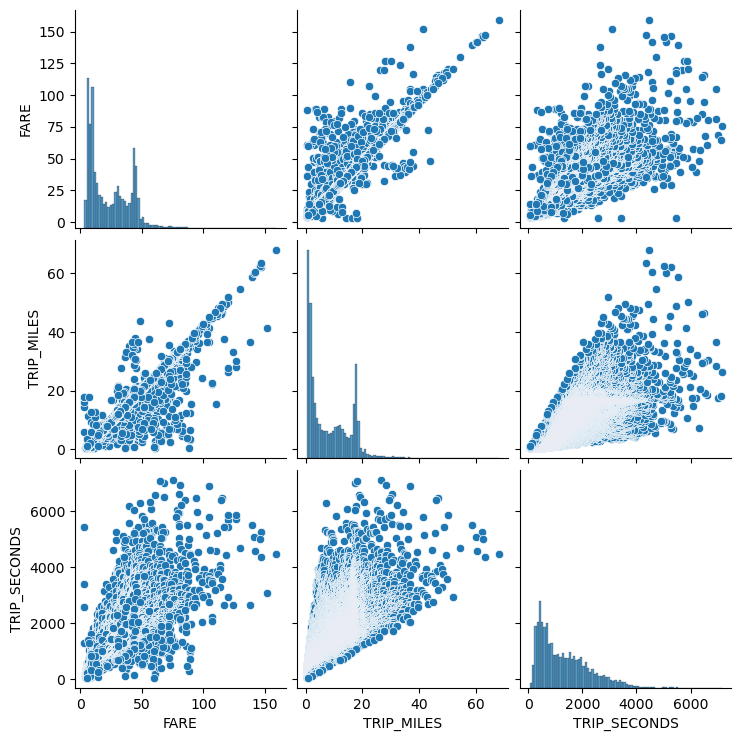

In [6]:
sns.pairplot(
    training_df,
    x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"],
    y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"]
)